In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import *

In [15]:
df = pd.read_csv('data/traficogt.csv')
# Limpiando datos
df = df.drop(df.columns[0], axis=1)	# Primera columna no es necesaria
df = df.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
df = df.drop(['id'], axis=1)
df = df.drop(['id_str'], axis=1)
df = df.drop(['url'], axis=1)

from string import punctuation
# Eliminar signos de puntuacion
df['rawContent'] = df['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))
# Eliminar @
df['rawContent'] = df['rawContent'].str.replace('@', '')
df['rawContent'] = df['rawContent'].str.replace('#', '')
# Eliminar emoji
df['rawContent'] = df['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df['rawContent'] = df['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# Manejar zona
df['rawContent'] = df['rawContent'].str.replace('zona ', 'zona')
# Elimar traficogt
df['rawContent'] = df['rawContent'].str.replace('traficogt', '')
df['rawContent'] = df['rawContent'].str.replace('transitogt', '')
df['rawContent'] = df['rawContent'].str.replace('tránsitogt', '')
df['rawContent'] = df['rawContent'].str.replace('tráficogt', '')
spanish_df = df[df['lang'] == 'es']
spanish_df.head()

,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,hashtags,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,amílcar montejo director comunicación emetra c...,1,2,8,0,1701654244858679742,"['ahora', 'tráficogt']",...,"{'id': 1701651855212691764, 'id_str': '1701651...",nan,nan,nan,nan,"<a href=""https://twitter.com"" rel=""nofollow"">t...",https://twitter.com,tweetdeck web app,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet
1,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,conductora negó movilizar vehículo multada cal...,149,78,524,49,1701651855212691764,[],...,nan,nan,nan,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,twitter for iphone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet
2,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,camión arena volteado viaducto pulté hacienda ...,2,1,4,0,1701348453916311903,"['transitogt', 'traficogt']",...,nan,nan,nan,nan,nan,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet
3,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,paciente 39 años dolor lumbar 1 año caída 45 s...,3,17,95,0,1701995859229958189,[],...,nan,nan,nan,nan,nan,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet
4,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,amílcar montejo director comunicación emetra i...,0,0,20,0,1701216420997017888,"['ahora', 'tráficogt']",...,nan,nan,nan,nan,nan,"<a href=""https://twitter.com"" rel=""nofollow"">t...",https://twitter.com,tweetdeck web app,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet


# Análisis exploratorio

## Tabla de frecuencia por palabra español

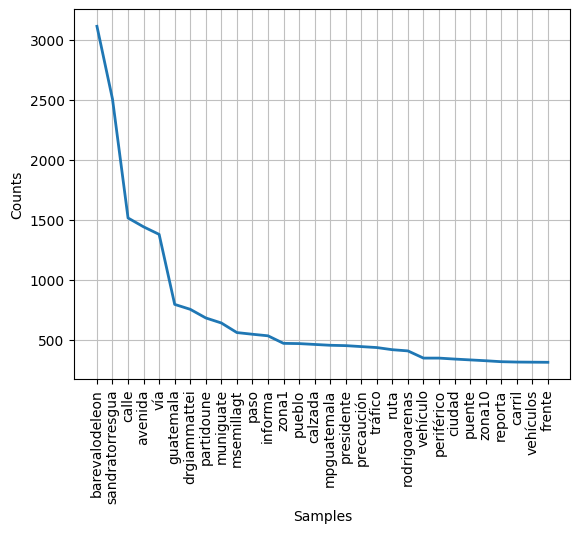

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
tweet_words = [w for sentence in spanish_df['rawContent'] for w in sentence.split()]
nlp_words=nltk.FreqDist(tweet_words)
nlp_words.plot(30)

## Analizando en la época de lluvia

/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9928 (\N{THUNDER CLOUD AND RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


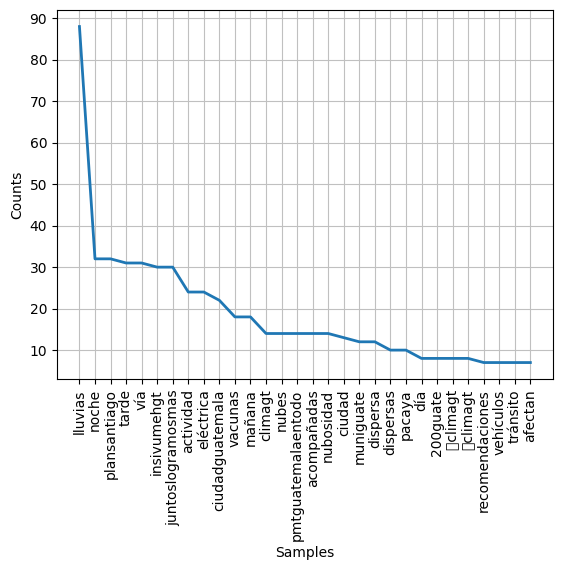

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
tweets_with_lluvia = spanish_df[spanish_df['rawContent'].str.contains('lluvias', case=False)]
tweet_words = [w for sentence in tweets_with_lluvia['rawContent'] for w in sentence.split()]
nlp_words=nltk.FreqDist(tweet_words)
nlp_words.plot(30)


In [10]:
# Count the number of tweets in tweets_with_lluvia that have the word 'accidente'

## Analizando tweets que contienen Zona5

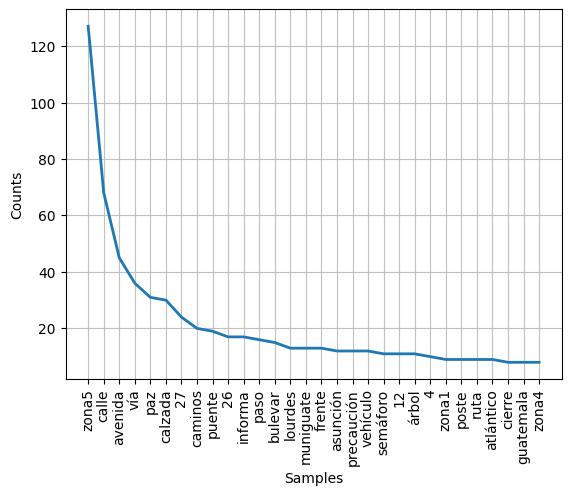

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
tweets_z5 = spanish_df[spanish_df['rawContent'].str.contains('zona5', case=False)]
tweet_words = [w for sentence in tweets_z5['rawContent'] for w in sentence.split()]
nlp_words=nltk.FreqDist(tweet_words)
nlp_words.plot(30)

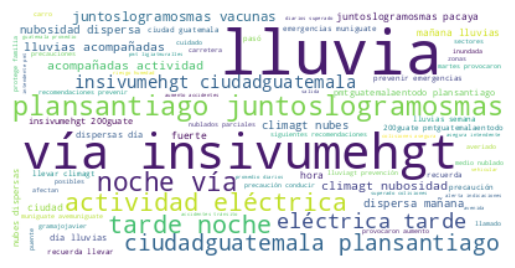

In [12]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(word for word in tweets_with_lluvia['rawContent'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()